In [1]:
# Temel kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Veri görselleştirme ayarları
sns.set(style="whitegrid")


In [3]:
# Veri setini yükleyelim
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# İlk 5 satırı inceleyelim
print(df.head())

# Veri tiplerine bakalım
print(df.info())

# Veride eksik değerler var mı kontrol edelim
print(df.isnull().sum())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [4]:
df.shape

(2111, 17)

In [21]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
# Kategorik sütunları LabelEncoder ile sayısal hale getirelim
labelencoder = LabelEncoder()

categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for col in categorical_cols:
    df[col] = labelencoder.fit_transform(df[col])

# Kodlanmış veriyi tekrar inceleyelim
print(df.head())


   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


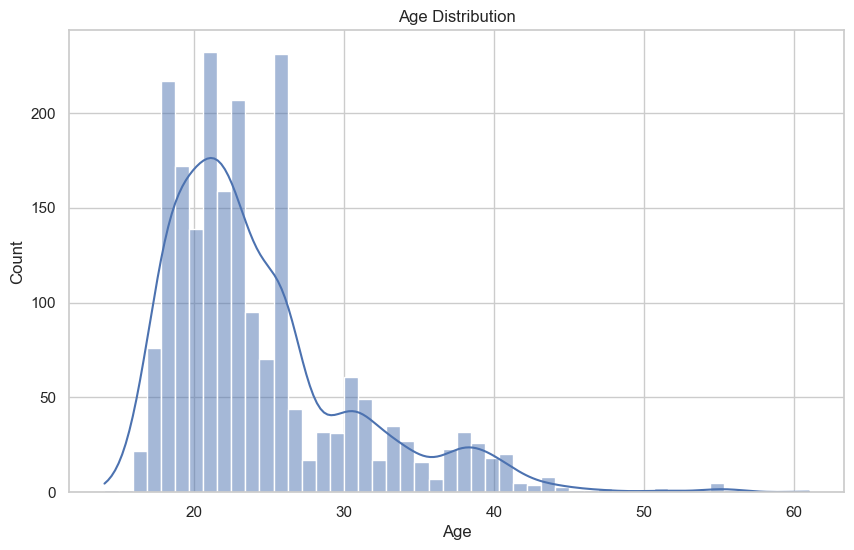

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


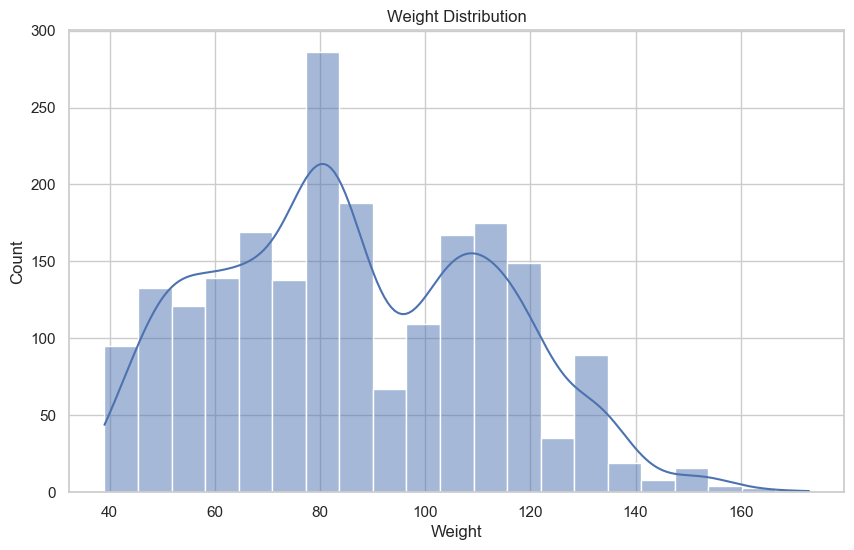

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Weight'], kde=True)
plt.title('Weight Distribution')
plt.show()


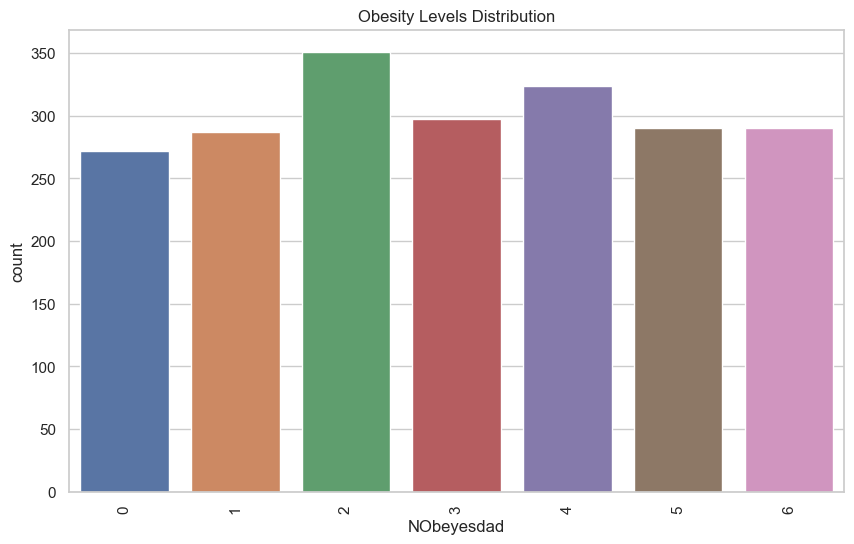

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Obesity Levels Distribution')
plt.xticks(rotation=90)
plt.show()


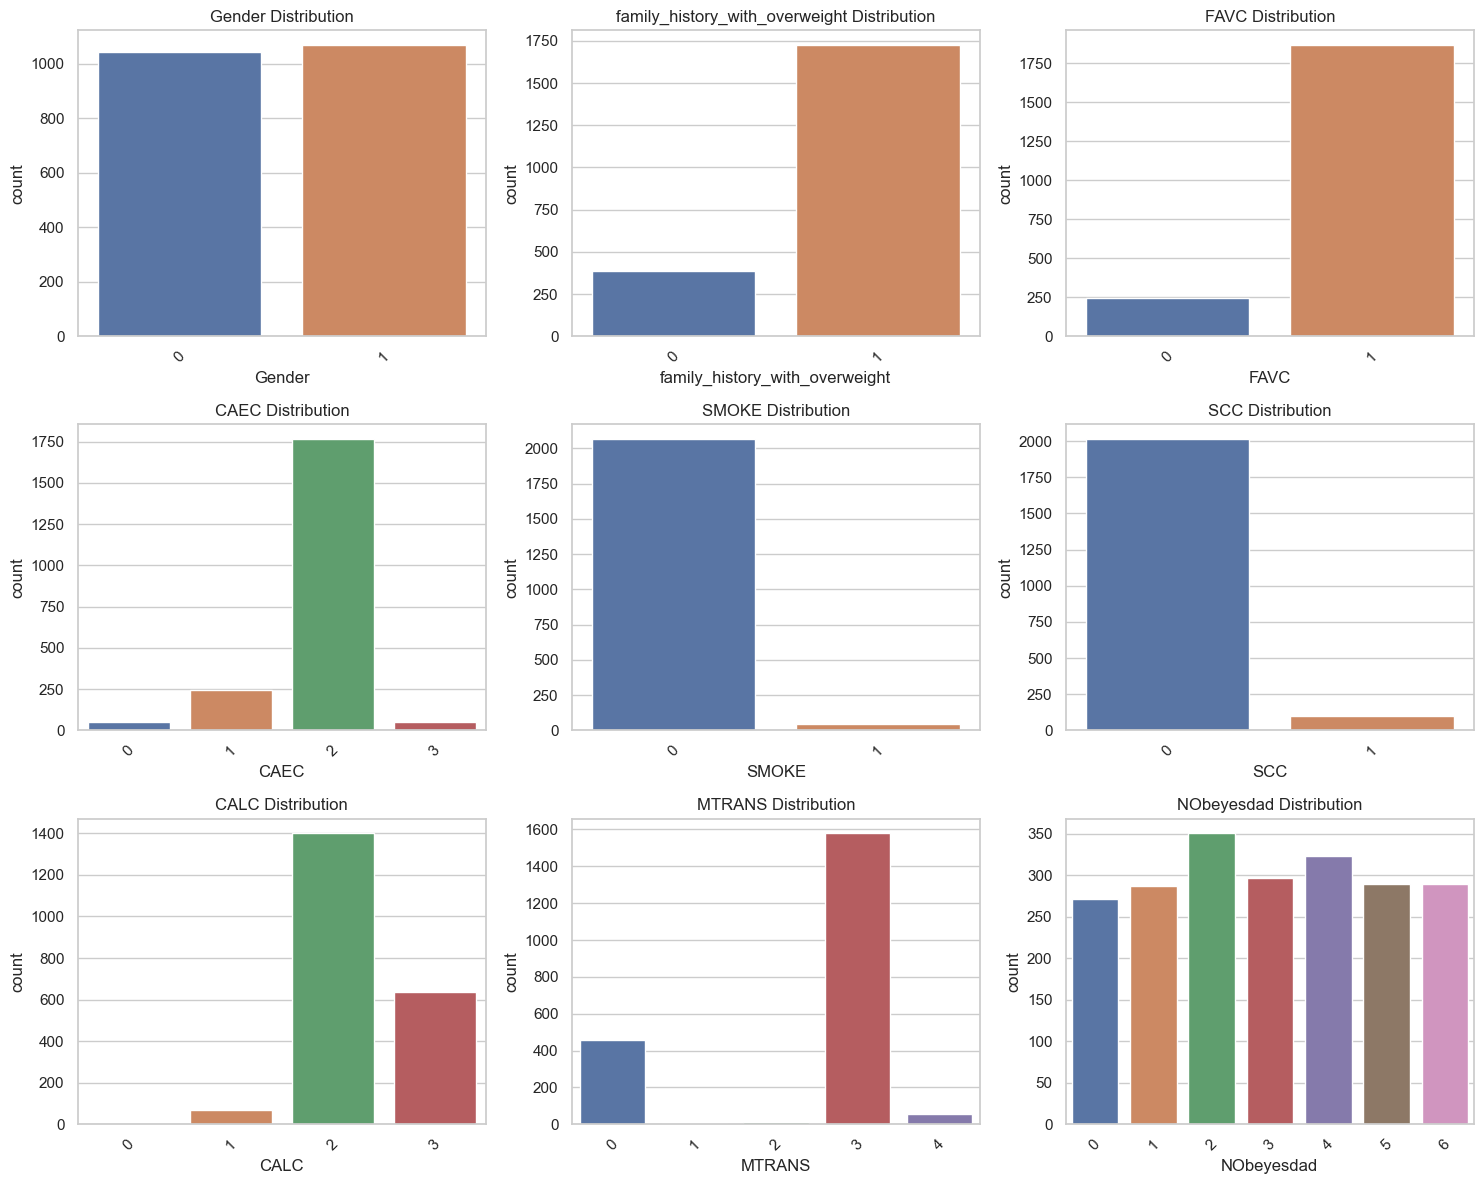

In [10]:
# Kategorik değişkenlerin listesi
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

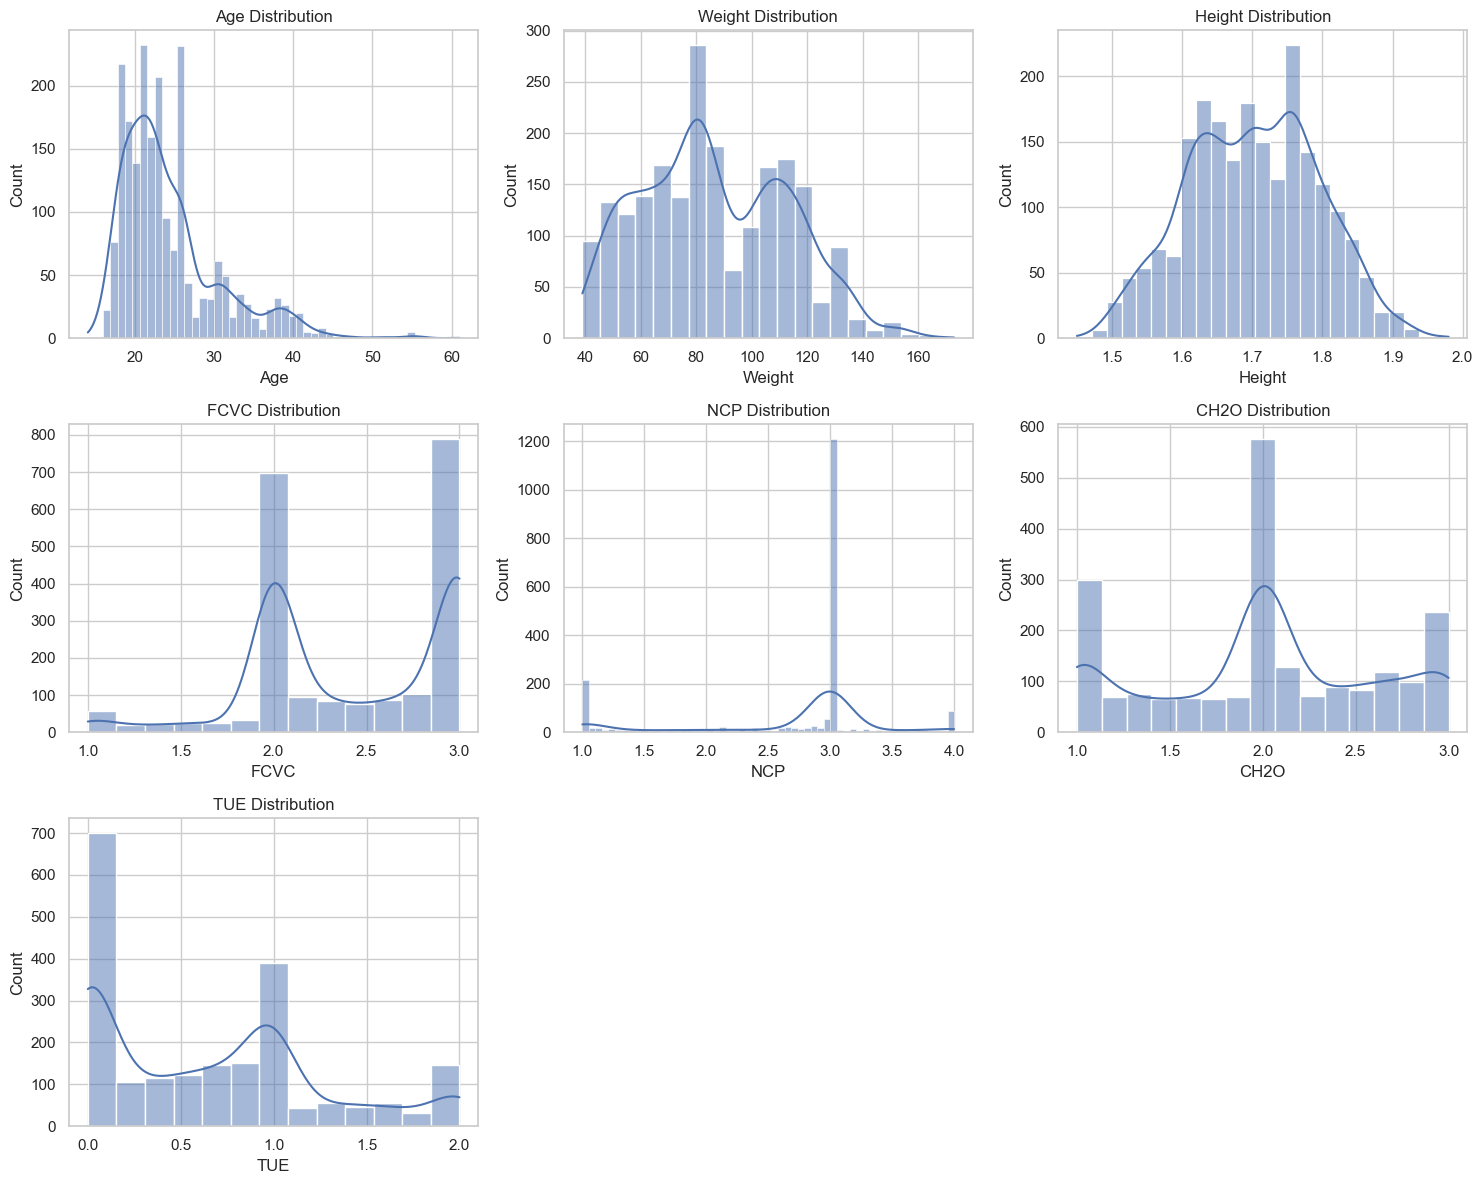

In [11]:
# Sürekli değişkenlerin listesi
continuous_cols = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'TUE']

plt.figure(figsize=(15, 12))

for i, col in enumerate(continuous_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()


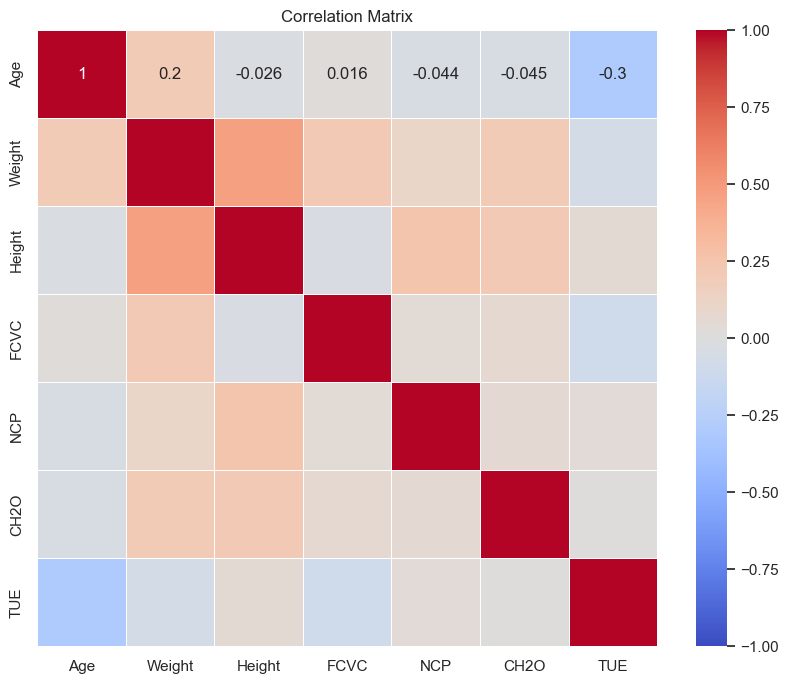

In [12]:
# Sürekli değişkenler arasındaki korelasyonu hesaplayalım
corr_matrix = df[continuous_cols].corr()

# Korelasyon matrisi görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


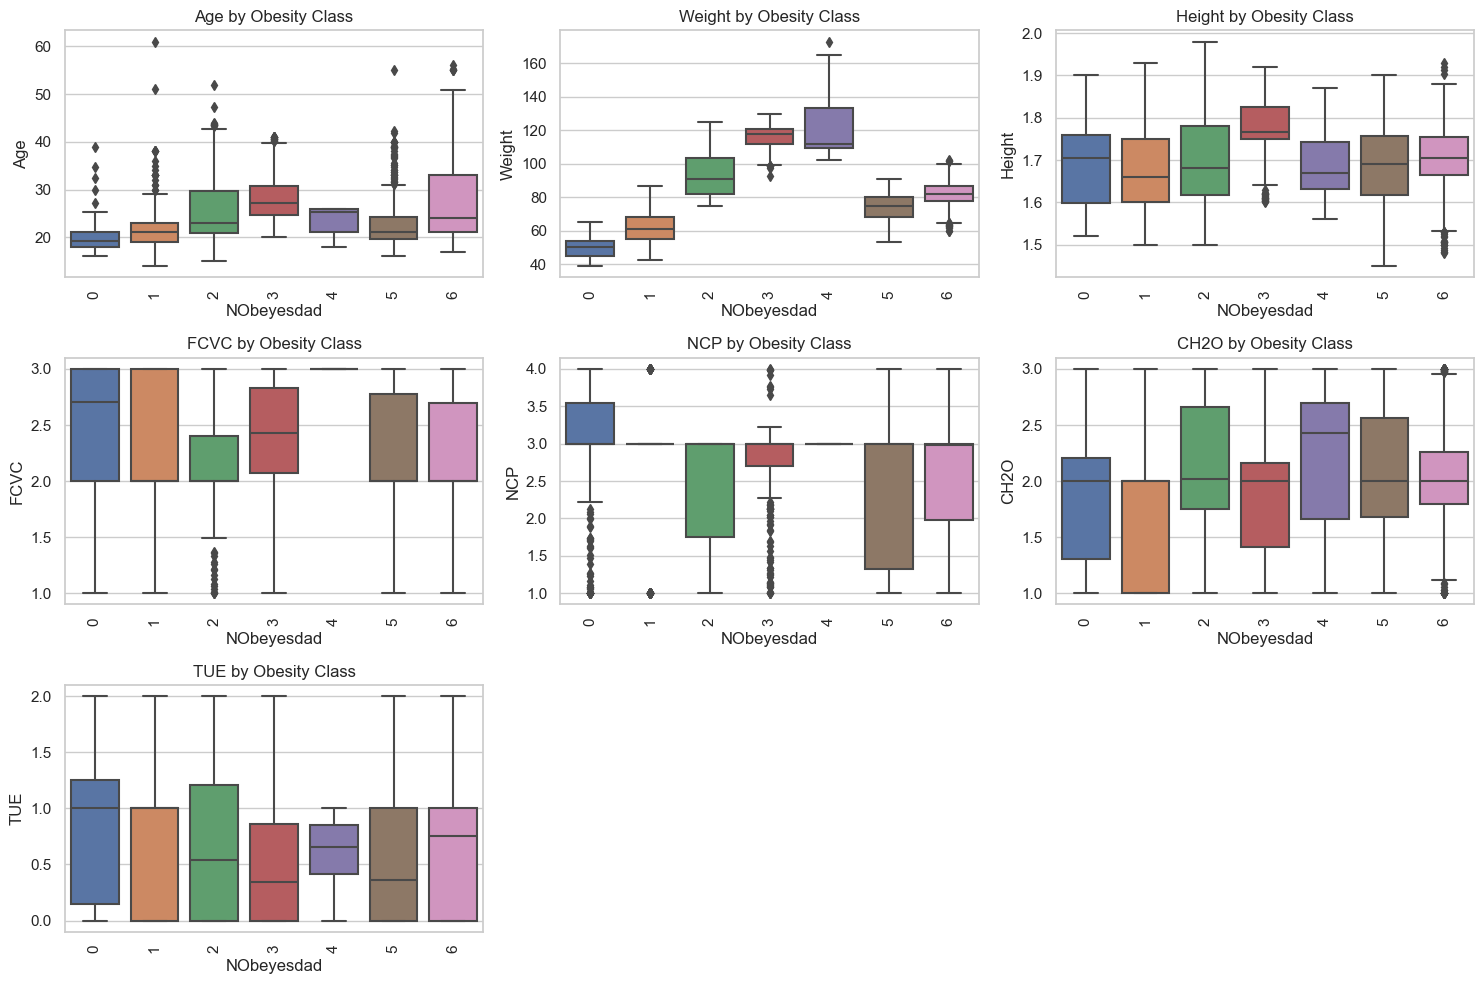

In [15]:
# Obezite sınıfı ile sürekli değişkenler arasındaki ilişkiler
plt.figure(figsize=(15, 10))

for i, col in enumerate(continuous_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='NObeyesdad', y=col, data=df)
    plt.title(f'{col} by Obesity Class')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


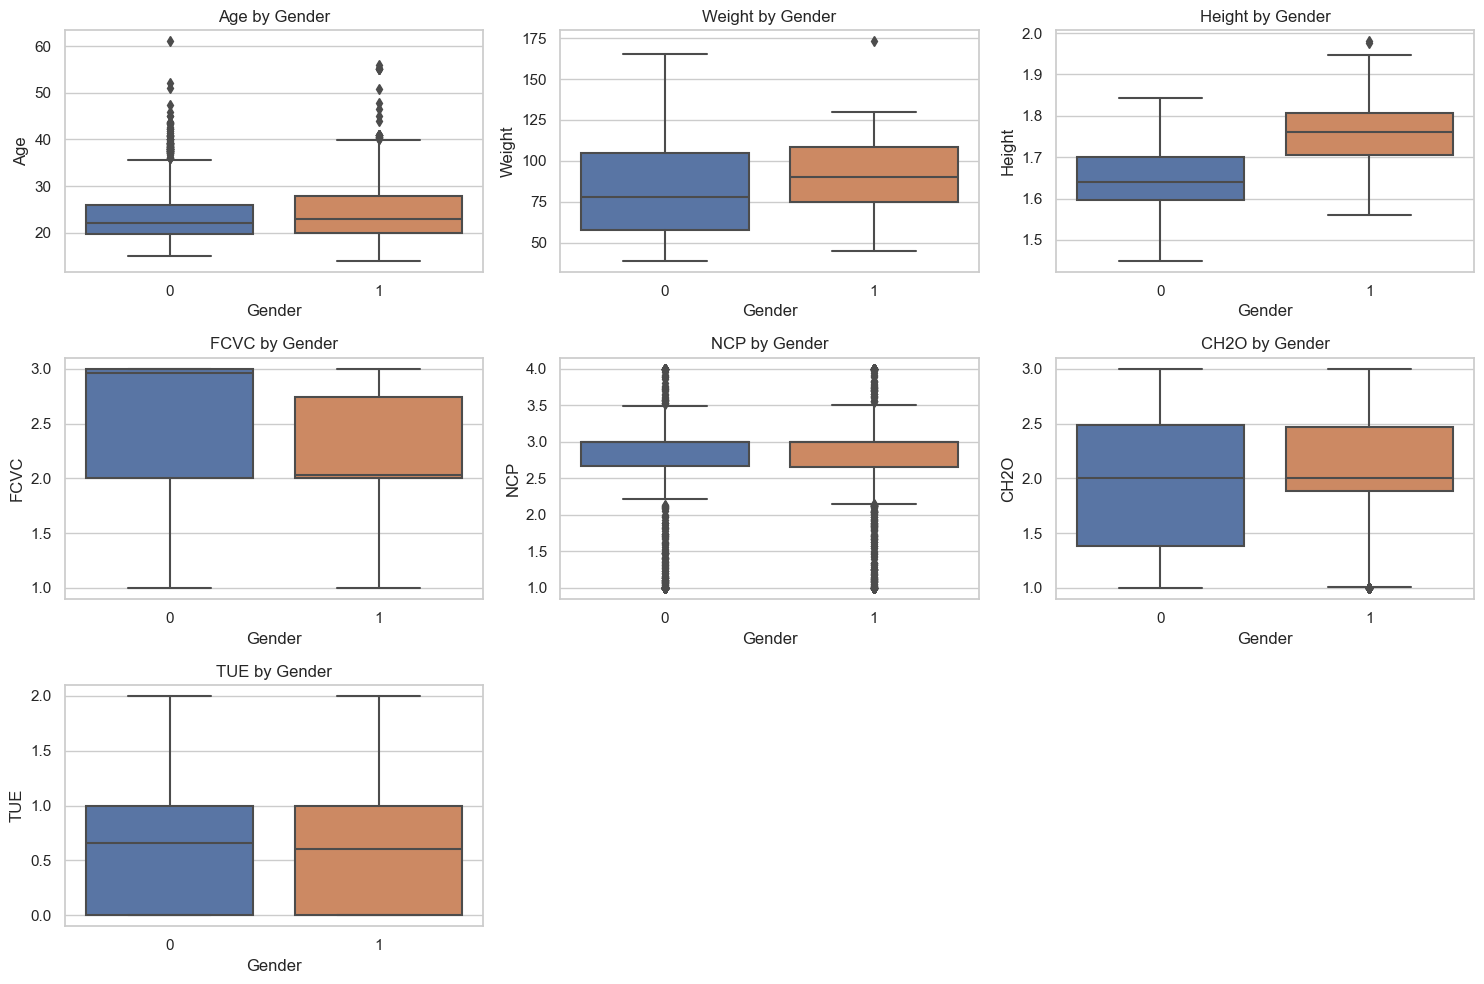

In [16]:
# Gender ile sürekli değişkenler arasındaki ilişkiler
plt.figure(figsize=(15, 10))

for i, col in enumerate(continuous_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Gender', y=col, data=df)
    plt.title(f'{col} by Gender')

plt.tight_layout()
plt.show()


In [8]:
# Hedef değişkeni (NObeyesdad) ve bağımsız değişkenleri ayıralım
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi standardize edelim
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


              precision    recall  f1-score   support

           0       0.99      0.95      0.97        86
           1       0.83      0.91      0.87        93
           2       0.98      0.96      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.89      0.85      0.87        88
           6       0.96      0.94      0.95        79

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.95      0.94      0.94       634



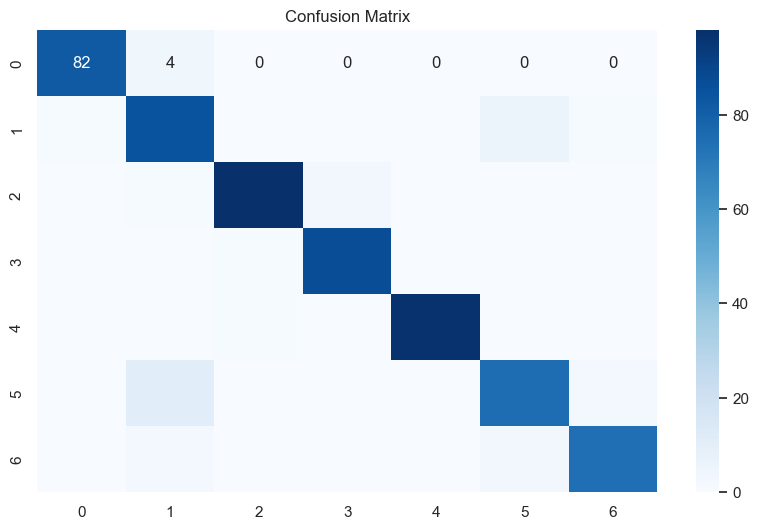

In [9]:
# Random Forest modeli oluşturalım
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Test setinde tahmin yapalım
y_pred = model.predict(X_test)

# Modelin performansını değerlendirelim
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [19]:
rmse

0.7597940946375253

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Modeli eğit
    model.fit(X_train, y_train)
    
    # Test seti üzerinde tahmin yap
    y_pred = model.predict(X_test)
    
    # Performans metriklerini hesapla
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Modelin sonuçlarını yazdır
    print(f"Model: {str(model)}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")

    
   
    
    return accuracy, precision, recall, f1


In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

# Kullanacağımız modeller
models = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42),
    LogisticRegression(max_iter=1000, random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    ExtraTreesClassifier(random_state=42),
    MLPClassifier(random_state=42, max_iter=1000)
]

# Performans sonuçlarını saklayalım
performance_results = []

# Her bir modeli değerlendirelim
for model in models:
    performance = evaluate_model(model, X_train, X_test, y_train, y_test)
    performance_results.append((model.__class__.__name__, performance))


Model: RandomForestClassifier(random_state=42)
Accuracy: 0.943217665615142
Precision: 0.945160254570022
Recall: 0.943217665615142
F1 Score: 0.9436939991173161


Model: GradientBoostingClassifier(random_state=42)
Accuracy: 0.9479495268138801
Precision: 0.9491778777399106
Recall: 0.9479495268138801
F1 Score: 0.9478273239260451




C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: AdaBoostClassifier(random_state=42)
Accuracy: 0.3659305993690852
Precision: 0.530309702314155
Recall: 0.3659305993690852
F1 Score: 0.25954755977908106


Model: SVC(random_state=42)
Accuracy: 0.8722397476340694
Precision: 0.8765265222982701
Recall: 0.8722397476340694
F1 Score: 0.8725050650544228


Model: LogisticRegression(max_iter=1000, random_state=42)
Accuracy: 0.8580441640378549
Precision: 0.8612730086211067
Recall: 0.8580441640378549
F1 Score: 0.85428119396124


Model: KNeighborsClassifier()
Accuracy: 0.804416403785489
Precision: 0.8022517188269486
Recall: 0.804416403785489
F1 Score: 0.7958209693388201


Model: DecisionTreeClassifier(random_state=42)
Accuracy: 0.9148264984227129
Precision: 0.9147448968493831
Recall: 0.9148264984227129
F1 Score: 0.9144991172712683


Model: GaussianNB()
Accuracy: 0.6056782334384858
Precision: 0.6148344448903227
Recall: 0.6056782334384858
F1 Score: 0.5867424942472462


Model: ExtraTreesClassifier(random_state=42)
Accuracy: 0.9353312302839116
Pr